In [9]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

##버전 체크
print(tf.__version__)

##IMDB 데이터셋 다운로드
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## 데이터 탐색 
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

# 리뷰 텍스트는 어휘 사전의 특정 단어를 나타내는 정수로 변환되어있음. 첫 번째 리뷰 확인
print(train_data[0])

# 첫 번째 리뷰와 두번째 리뷰에서 단어의 개수 출력
len(train_data[0]), len(train_data[1])


2.4.1
훈련 샘플: 25000, 레이블: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


(218, 189)

In [11]:
## 정수를 단어로 다시 변환하기 - 정수와 문자열을 매핑한 딕셔너리 객체에 질의하는 헬퍼 함수를 만듦.
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

## 이제 decode_review 함수를 사용해 첫번째 리뷰 텍스트 출력
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [14]:
##데이터 준비 - 리뷰 (정수배열)는 신경망에 주입하기 전에 텐서로 변환되어야 함.
# 튜토리얼 사용 방식 - 정수 배열의 길이가 모두 같도록 padding을 추가해 max_length*num_reviews 크기의 정수 텐서를 만듦. 이런 형태의 텐서를 다룰 수 있는 임베딩 층을 신경망의 첫 번째 층으로 사용할 수 있음.

# 영화 리뷰의 길이가 같아야 하므로 pad_sequences 함수 이용해 길이를 맞춤 
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
# 샘플 길이 확인
len(train_data[0]), len(train_data[1])
# 패딩된 첫 번째 리뷰 내용을 확인
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [15]:
## 모델 구성
# 신경망은 층(layer)을 쌓아서 만듦. 이 구조에서는 두가지를 결정해야함. 
# 1. 모델에서 얼마나 많은 층을 사용할 것인가?  2. 각 층에서 얼마나 많은 은닉 유닛(hidden unit)을 사용할 것인가?
# 이 예제의 입력 데이터는 단어 인덱스의 배열. 예측할 레이블은 0 또는 1

# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

# 층을 순서대로 쌓아 분류기(classifier)를 만듦.
# 1. 첫 번째 층은 Embedding층 : 정수로 인코딩된 단어를 입력 받고 각 단어 인덱스에 해당하는 임베딩 벡터를 찾는다. 이 벡터는 모델이 훈련되면서 학습된고 출력 배열에 새로운 차원으로 추가된다. 최종 차원은 (batch, sequence, embedding)이 된다.
# 2. 그 다음 층은 GlobalAveragePooling1D 층: sequence 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이의 출력 벡터를 반환. 길이가 다른 입력을 다루는 가장 간단한 방법이다.
# 3. fully-connected 층 : 이 고정 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결(fully-connected) 층(Dense)을 거친다. 
# 4. 마지막 층은 하나의 출력 노드를 가진 완전 연결 층 : sigmoid 호라성화 함수를 사용하여 0과 1 사이의 실수를 출력. 이 값은 확률 또는 신뢰도를 나타낸다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [16]:
## 은닉 유닛
#위 모델에는 입력과 출력 사이에 두 개의 중간 또는 "은닉" 층이 있다. 출력(유닛 또는 노드, 뉴런)의 개수는 층이 가진 표현 공간(representational space)의 차원이 된다. 다른 말로 하면, 내부 표현을 학습할 때 허용되는 네트워크 자유도의 양이다.
# 모델에 많은 은닉 유닛(고차원의 표현 공간)과 층이 있다면 네트워크는 더 복잡한 표현을 학습할 수 있다. 하지만 네트워크의 계산 비용이 많이 들고 원치않는 패턴을 학습할 수도 있다. 
# 이런 표현은 훈련 데이터의 성능을 향상시키지만 테스트 데이터에서는 그렇지 못한다. 이를 과대적합(overfitting)이라고 한다.

##손실 함수와 옵티마이저
# 모델이 훈련하려면 손실 함수(loss function)과 옵티마이저(optimizer)가 필요.
# 이 예제는 이진 분류 문제이고 모델이 확률을 출력하므로(출력층의 유닛이 하나이고 sigmoid 활성화 함수를 사용) binary_crossentropy 손실 함수를 사용.

# 모델이 사용할 옵티마이저와 손실 함수 설정
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
## 검증 세트 만들기
# 모델을 훈련할 때 모델이 만난 적 없는 데이터에서 정확도를 확인하는 것이 좋다. 원본 훈련 데이터에서 10,000개의 샘플을 떼어내어 검증 세트(validation set)를 만든다.
# 테스트 세트를 사용하지 않는 이유? 훈련 데이터만을 사용하여 모델을 개발하고 튜닝하는 것이 목표. 그 다음 테스트 세트를 사용해서 딱 한 번만 정확도를 평가함.

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 모델 훈련
# 이 모델을 512개의 샘플로 이루어진 미니배치(mini-batch)에서 40번의 에포크(epoch) 동안 훈련
# x_train과 y_train 텐서에 있는 모든 샘플에 대해 40번 반복한다는 뜻이다. 훈련하는 동안 10,000개의 검증 세트에서 모델의 손실과 정확도를 모니터링

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 6s 151ms/step - loss: 0.6925 - accuracy: 0.5337 - val_loss: 0.6895 - val_accuracy: 0.5873
Epoch 2/40
30/30 [==============================] - 1s 37ms/step - loss: 0.6870 - accuracy: 0.6312 - val_loss: 0.6811 - val_accuracy: 0.7008
Epoch 3/40
30/30 [==============================] - 1s 42ms/step - loss: 0.6764 - accuracy: 0.7260 - val_loss: 0.6661 - val_accuracy: 0.7433
Epoch 4/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6575 - accuracy: 0.7693 - val_loss: 0.6417 - val_accuracy: 0.7658
Epoch 5/40
30/30 [==============================] - 2s 54ms/step - loss: 0.6290 - accuracy: 0.7822 - val_loss: 0.6086 - val_accuracy: 0.7841
Epoch 6/40
30/30 [==============================] - 1s 44ms/step - loss: 0.5885 - accuracy: 0.8053 - val_loss: 0.5689 - val_accuracy: 0.8025
Epoch 7/40
30/30 [==============================] - 1s 47ms/step - loss: 0.5418 - accuracy: 0.8294 - val_loss: 0.5259 - val_accuracy: 0.8189
Epoch 8/40
3

In [21]:
## 모델 평가
# 모델의 성능을 파악해보자. 두 개의 값이 반환되는데 손실과 정확도이다. 손실은 오차를 타나내느 숫자이므로 낮을수록 좋다.

results = model.evaluate(test_data, test_labels, verbose=2)
print(results)

# 이 예제는 매우 단순한 방식을 사용하므로 87% 정도의 정확도를 달성함. 고급방법을 사용한 모델은 95%에 가까운 정확도를 얻는다.

782/782 - 1s - loss: 0.3313 - accuracy: 0.8716
[0.331306129693985, 0.8716400265693665]


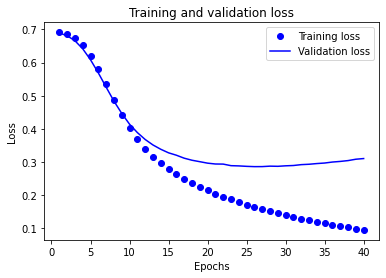

In [23]:
## 정확도와 손실 그래프 그리기
# model.fit()은 History 객체를 반화함. 여깅는 훈련하는 동안 일어난 모든 정보가 담긴 딕셔너리가 들어있다.

history_dict=history.history
history_dict.keys()

# 훈련과 검증단계에서 모니터링하는 네 가지 제표가 있다. 훈련 손실과 검증 손실을 그래프로 ㄱ려보고, 훈련 정확도와 검증 정확도도 그래프로 그려서 비교해보자.
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

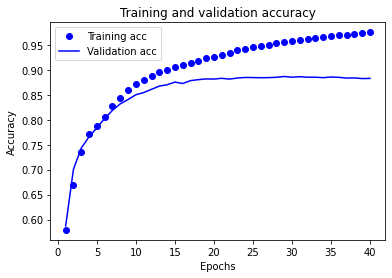

In [24]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 이 그래프에서 점선은 훈련 손실과 정확도를 나타낸다. 실선은 검증 손실과 검증 정확도 이다.

# 훈련 손실은 에포크마다 감소하고 훈련 정확도는 증가한다는 것을 주목. 경사 하강법 최적화를 사용할 때 볼 수 있는 현상이다. 매 반복마다 최적화 대상의 값을 최소화한다.
# 하지만 검증 손실과 검증 정확도에서는 그렇지 못한다. 약 20번째 에포크 이후가 최적점인 것 같다. 이는 과대적합 때문. 이전에 본적 없는 데이터보다 훈련 데이터에서 더 잘 동작한다. 이 지점부터는 모델이 과도하게 최적화되어 테스트 데이터에서 일반화되기 어려운 훈련 데이터의 특정 표현을 학습한다.

# 여기에서는 과대적합을 막기 위해 단순이 20번째 에포크 근처에서 훈련을 멈출 수 있다. 나중에는 콜백을 사용하여 자동으로 이렇게 하는 방법을 배워보자